In [1]:
# Install PyTesseract and setup on Colab
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,561 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
!unzip -qq OCRSamples.zip

--2024-01-15 06:23:59--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.245.108, 52.95.149.14, 52.95.143.82, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.245.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237096 (232K) [application/zip]
Saving to: ‘OCRSamples.zip’

OCRSamples.zip      100%[===================>] 231.54K   244KB/s    in 0.9s    

2024-01-15 06:24:01 (244 KB/s) - ‘OCRSamples.zip’ saved [237096/237096]



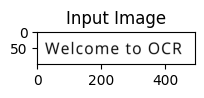

PyTesseract Extracted: Welcome to OCR



In [3]:
img = cv2.imread('OCR Samples/OCR1.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

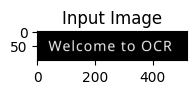

PyTesseract Extracted: Welcome to OCR



In [4]:
img = cv2.imread('OCR Samples/OCR2.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

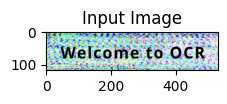

PyTesseract Extracted:  



In [5]:
img = cv2.imread('OCR Samples/OCR3.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

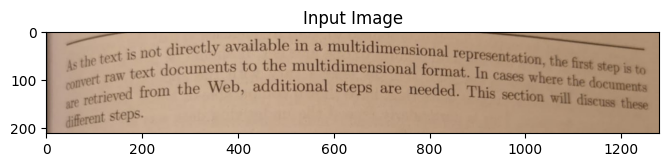

PyTesseract Extracted: directly avail.
able i
e in a multidimensi
Sional re
‘Presentatj
Jon, the
» the first

As the text is not
convert raw text documents
: to th
are retrieved from e multidi
n the Web, eal format
eps are at. In
n cases
eeded. This where the Step is to
ion will discuss
these

different stePs-



In [6]:
img = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", img, size = 48)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

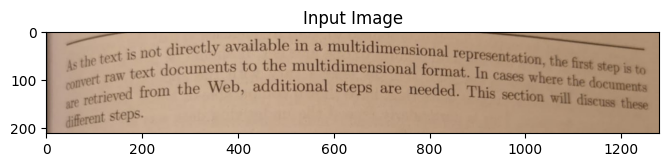

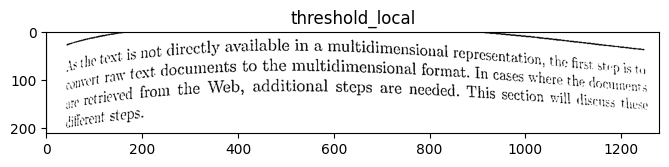

PyTesseract Extracted: s not directly i
‘ly available i
text do € in a multidi
d fro oa ck to the multi jultidimensio
m the Web, additi idimensional nal represe
ional steps ate format th entation, the fj
nec In cases where the?
eded. This sects here th ep isto
section

gs the text I
convert raw
ae retrieve

diferent steps-

e
sOCUinents

n will dij
"All disengs t{
23 ISO



In [9]:
from skimage.filters import threshold_local

image = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", image, size = 48)

# We get the Value component from the HSV color space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 15, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh, size = 48)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

In [10]:
# Get our new test image
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg


--2024-01-15 06:24:39--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg [following]
--2024-01-15 06:24:39--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.009s  

2024-01-15 06:24:39 (10.2 MB/s) - ‘Receipt-woolworth.jpg’ s

In [12]:
from pytesseract import Output

d = pytesseract.image_to_data(thresh, output_type = Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


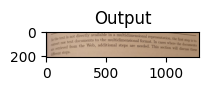

In [14]:
n_boxes = len(d['text'])

for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

imshow('Output', img, size = 12)


In [15]:
!pip install easyocr
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.9 MB/s eta 0:00:00
--2024-01-15 06:25:10--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg [following]
--2024-01-15 06:25:10--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, a

In [16]:

!pip uninstall opencv-python -y
!pip install opencv-python-headless==4.1.2.30

ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


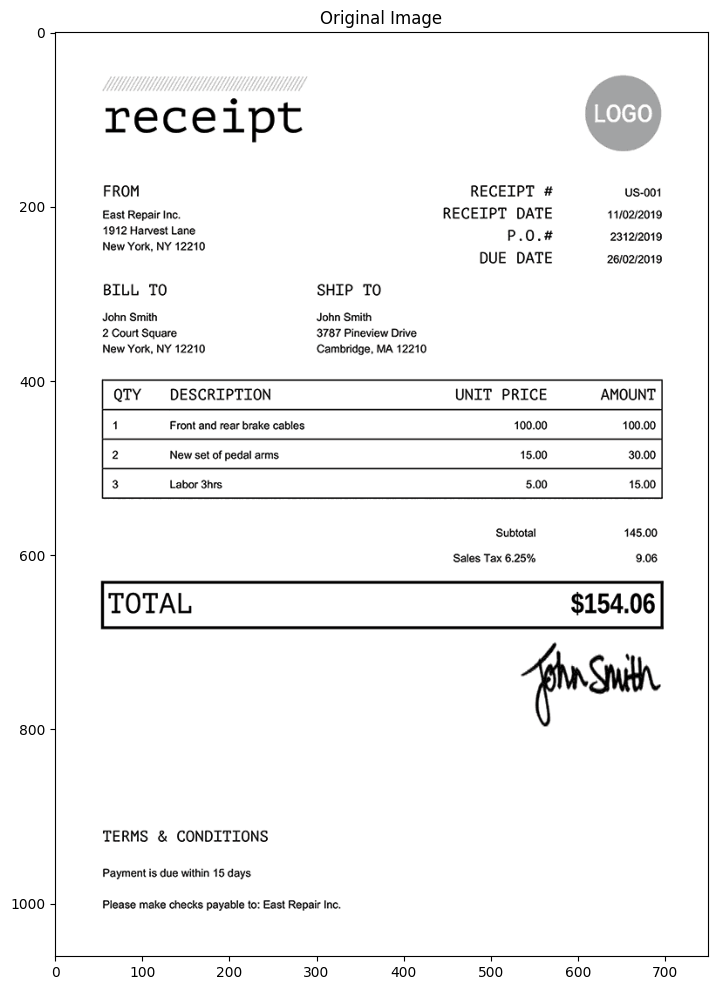

Detecting and OCR'ing text from input image...
Completed in 0.7928767204284668 seconds


In [39]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import cv2
import time

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# load the input image from disk
image = cv2.imread('/content/rr.png')
imshow("Original Image", image, size = 12)

# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = True)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

In [40]:
results


[([[51, 70], [292, 70], [292, 136], [51, 136]], 'receipt', 0.9999674687644614),
 ([[614, 78], [690, 78], [690, 110], [614, 110]], 'LOGO', 0.9916439056396484),
 ([[53, 173], [99, 173], [99, 193], [53, 193]], 'FROM', 0.9992877840995789),
 ([[474, 170], [554, 170], [554, 194], [474, 194]],
  'RECEIPT',
  0.9990793962251833),
 ([[653, 177], [699, 177], [699, 193], [653, 193]],
  'US-001',
  0.9942393499217677),
 ([[53, 203], [143, 203], [143, 219], [53, 219]],
  'East Repair Inc_',
  0.8117757098403481),
 ([[442, 196], [574, 196], [574, 220], [442, 220]],
  'RECEIPT DATE',
  0.9983762900637831),
 ([[633, 203], [699, 203], [699, 219], [633, 219]],
  '11/02/2019',
  0.9195005475232598),
 ([[53, 221], [165, 221], [165, 237], [53, 237]],
  '1912 Harvest Lane',
  0.743029362917244),
 ([[519, 223], [573, 223], [573, 243], [519, 243]],
  'P.0.#',
  0.8619808130031542),
 ([[635, 227], [699, 227], [699, 243], [635, 243]],
  '2312/2019',
  0.8372137304904608),
 ([[53, 241], [83, 241], [83, 255], [53

 Probability of Text: 99.997% OCR'd Text: receipt
 Probability of Text: 99.164% OCR'd Text: LOGO
 Probability of Text: 99.929% OCR'd Text: FROM
 Probability of Text: 99.908% OCR'd Text: RECEIPT
 Probability of Text: 99.424% OCR'd Text: US-001
 Probability of Text: 81.178% OCR'd Text: East Repair Inc_
 Probability of Text: 99.838% OCR'd Text: RECEIPT DATE
 Probability of Text: 91.950% OCR'd Text: 11/02/2019
 Probability of Text: 74.303% OCR'd Text: 1912 Harvest Lane
 Probability of Text: 86.198% OCR'd Text: P.0.#
 Probability of Text: 83.721% OCR'd Text: 2312/2019
 Probability of Text: 99.962% OCR'd Text: New
 Probability of Text: 99.222% OCR'd Text: NY 12210
 Probability of Text: 66.058% OCR'd Text: DUE  DATE
 Probability of Text: 77.173% OCR'd Text: 26/02/2019
 Probability of Text: 94.131% OCR'd Text: BILL TO
 Probability of Text: 96.183% OCR'd Text: SHIP TO
 Probability of Text: 92.112% OCR'd Text: John Smith
 Probability of Text: 99.361% OCR'd Text: John Smith
 Probability of Text: 

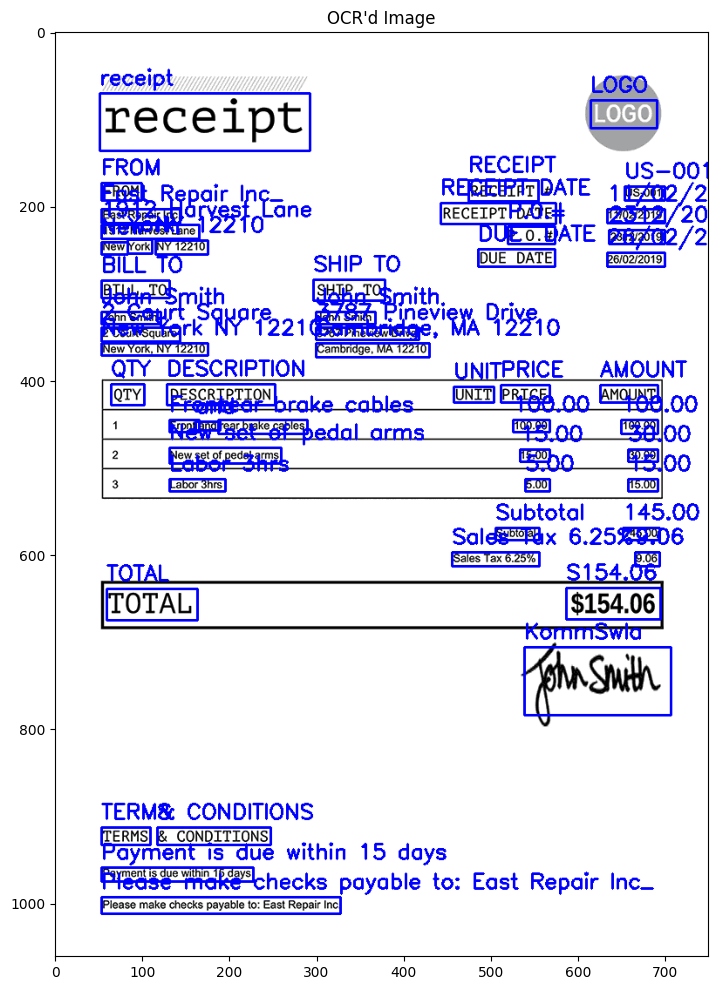

In [41]:
all_text = []

# iterate over our extracted text
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imshow("OCR'd Image", image, size = 12)

[INFO] 0.9803: receipt
[INFO] 0.3452: |060
[INFO] 0.8056: FROM
[INFO] 0.5123: RECEIPT
[INFO] 0.3769: U$-001
[INFO] 0.7191: East Repair Inc
[INFO] 0.6340: RECEIPT DATE
[INFO] 0.6099: 11/02/2019
[INFO] 0.5640: 1912 Hanvest Lane
[INFO] 0.2149: P ، ٥.#
[INFO] 0.9909: 2312/2019
[INFO] 0.1990: ٨٥w
[INFO] 0.4605: NV 12210
[INFO] 0.3067: DU٤ D4T٤
[INFO] 0.9972: 26/02/2019
[INFO] 0.5900: BILL TO
[INFO] 0.4784: SHIP  TO
[INFO] 0.6361: Jchn Smith
[INFO] 0.6682: John Smith
[INFO] 0.9103: 2 Court Square
[INFO] 0.7134: 37B7 Pineview Drive
[INFO] 0.3843: New York. NY 12210
[INFO] 0.6545: Cambridge, MA 12210
[INFO] 0.7447: QTY
[INFO] 0.8359: DESCRIPTION
[INFO] 0.9992: UNIT
[INFO] 0.9927: PRICE
[INFO] 0.3643: AM0UNT
[INFO] 0.9759: Front
[INFO] 0.8607: rear brake cables
[INFO] 0.9391: 100.00
[INFO] 0.6829: 100.00
[INFO] 0.7352: New set of pedal arms
[INFO] 0.8646: 15.00
[INFO] 0.9991: 30.00
[INFO] 0.7488: Labor 3hrs
[INFO] 0.9504: 5.00
[INFO] 0.7487: 15.00
[INFO] 0.8835: Subtolal
[INFO] 0.9971: 145.00
[

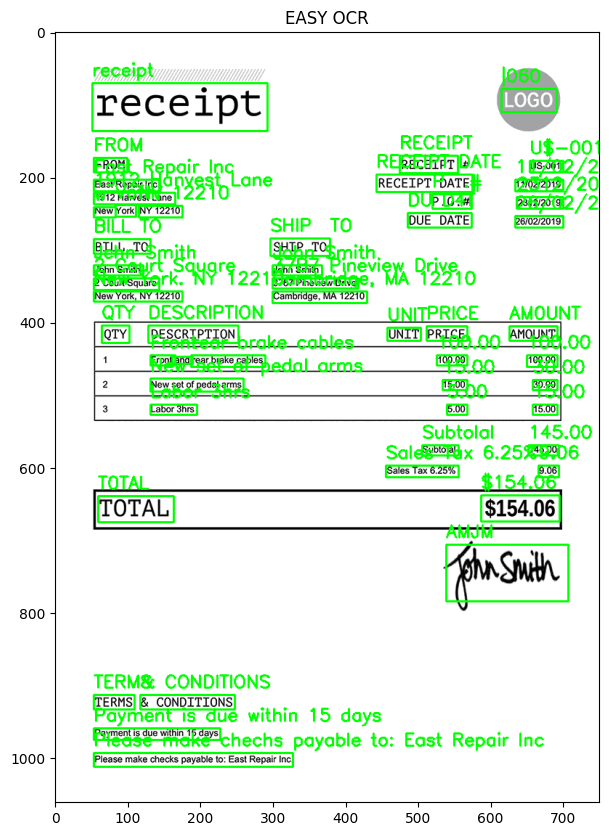

EASY OCR Extracted: 


In [43]:
import cv2
from easyocr import Reader
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

def clean_text(text):
    # remove non-ASCII text so we can draw the text on the image
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()

image = cv2.imread('/content/rr.png')

reader = Reader(["en","ar"], gpu=True)
results = reader.readtext(image)

# loop over the results
for (bbox, text, prob) in results:
    # display the OCR'd text and associated probability
    print("[INFO] {:.4f}: {}".format(prob, text))

    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # clean text and draw the box surrounding the text along
    text = clean_text(text)
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Apply the threshold operation
#thresh = (V > T).astype("uint8") * 255
imshow("EASY OCR", image)
print("EASY OCR Extracted: {}".format(text))